In [1]:
%autosave 0

Autosave disabled


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from adam_wrangle import clean_grades
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

Let's read in the grades data from the wrangle module.

In [3]:
df = clean_grades()
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97


Before scaling, what **important** step do we have to complete?

we have to split our data so we only learn parameters from train!

In [5]:
#only fit scaling object to train data set
seed = 42

train, val_test = train_test_split(df, train_size = 0.7,
                                  random_state = seed)

val, test = train_test_split(val_test, train_size = 0.5,
                           random_state = seed)

train.shape, val.shape, test.shape

((71, 5), (15, 5), (16, 5))

Let's take a pass at the [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). What kind of transformation does this scaler perform, and what will be the resulting range of values?

this is a linear transformation which will maintain the shape of our data.

the range will be 0 to 1 is the resulting range

In [10]:
mms = MinMaxScaler()

mms.fit(train[['final_grade']])

MinMaxScaler()

In [12]:
train['final_grade_mms'] = mms.transform(train[['final_grade']])
train.head()

,student_id,exam1,exam2,exam3,final_grade,final_grade_mms
12,14,100.0,90,95,96,0.96875
102,104,70.0,75,78,72,0.21875
56,58,79.0,70,85,81,0.50000
29,31,93.0,90,96,97,1.00000
65,67,98.0,93,96,95,0.93750


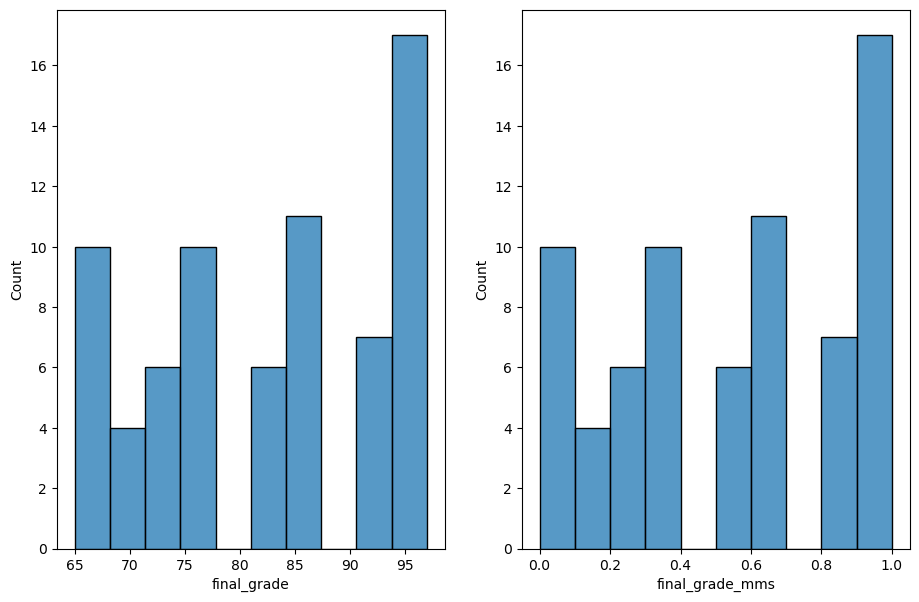

In [27]:
def compare_data(scaled_col, df = train, original='final_grade'):
    plt.figure(figsize=(11,7))
    
    plt.subplot(121)
    sns.histplot(data=df, x=original, bins=10)

    plt.subplot(122)  # 1 row and 2 columns
    sns.histplot(data=train, x= scaled_col, bins=10)

    plt.show()
    
compare_data('final_grade_mms')

Left is unscale data

Right is scaled data and the shape of the data has been preserved

Next up is the [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). What kind of transformation is this, and what is the resulting range of values?

Everything's linear so Linear transformation with value of 
we're expecting a mean of 0 and standard deviatino of 1. This will result in small negative and positive values

In [31]:
ss = StandardScaler()
ss.fit(train[['final_grade']])

train['final_grade_ss'] = ss.transform(train[['final_grade']])
train.head()

,student_id,exam1,exam2,exam3,final_grade,final_grade_mms,final_grade_ss
12,14,100.0,90,95,96,0.96875,1.252900
102,104,70.0,75,78,72,0.21875,-0.973317
56,58,79.0,70,85,81,0.50000,-0.138485
29,31,93.0,90,96,97,1.00000,1.345659
65,67,98.0,93,96,95,0.93750,1.160141


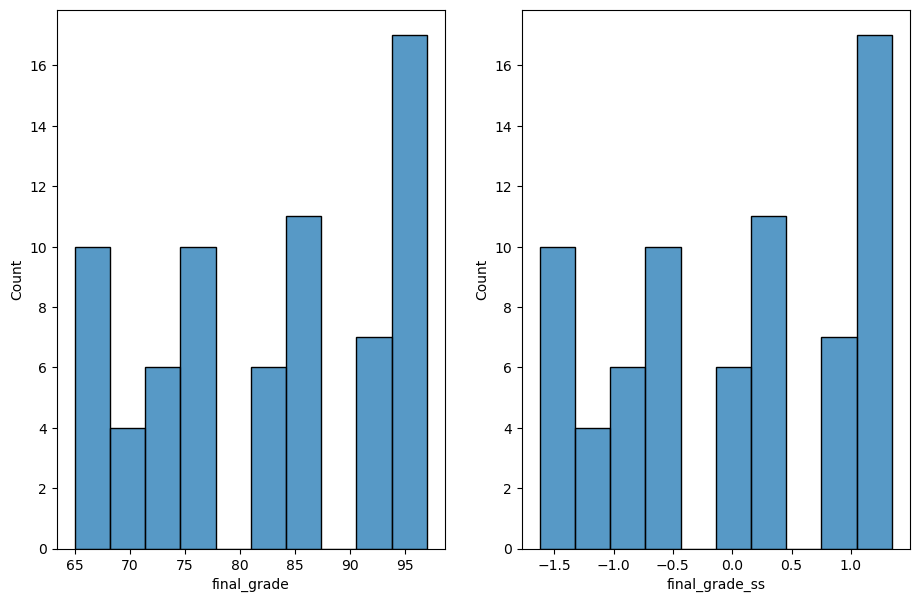

In [32]:
compare_data('final_grade_ss')

Last up we have the [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html). What kind of transformation and what resulting range of values?

In [34]:
#Create an instance of the RobustScaler object
rs = RobustScaler()

#fit the object to our desired column
rs.fit(train[['final_grade']])

#transform the features and assign to a new column
train['final_grade_rs'] = rs.transform(train[['final_grade']])

#did it work
train.head()

,student_id,exam1,exam2,exam3,final_grade,final_grade_mms,final_grade_ss,final_grade_rs
12,14,100.0,90,95,96,0.96875,1.252900,0.714286
102,104,70.0,75,78,72,0.21875,-0.973317,-0.428571
56,58,79.0,70,85,81,0.50000,-0.138485,0.000000
29,31,93.0,90,96,97,1.00000,1.345659,0.761905
65,67,98.0,93,96,95,0.93750,1.160141,0.666667


we can scale more than one column at once!

In [45]:

mms = MinMaxScaler()

mms.fit(train[['exam1', 'exam2', 'exam3']])

mms.train[['exam1', 'exam2', 'exam3']] = mms.transform(train[['exam1', 'exam2', 'exam3']])

train.head()


TypeError: float() argument must be a string or a real number, not 'MinMaxScaler'

In [43]:
val[['exam1','exam2','exam3']] = mms.transform(val[['exam1','exam2','exam3']])
val.head()

AttributeError: 'MinMaxScaler' object has no attribute 'scale_'